In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets

In [63]:
data_cognitive = pd.read_csv("raw_data/cognitive-bias.csv")
data_fakenews = pd.read_csv("raw_data/fake-news.csv")
data_hate = pd.read_csv("raw_data/hate-speech.csv")

# Fake News dataset



Summary key considerations:
- no Nan, no duplicates
- 8,542 rows
- X (i.e. 'text') is an "object" => not a string ? 
- perfectly balanced dataset (50/50)
- average number of words = 17; max number of words = 

## Basic investigation

In [54]:
print(f"Fake News dataset has {data_fakenews.shape[0]} rows")

Fake News dataset has 8542 rows


In [52]:
data_fakenews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8542 entries, 0 to 8541
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          8542 non-null   object
 1   text        8542 non-null   object
 2   label       8542 non-null   int64 
 3   dataset_id  8542 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 267.1+ KB


In [57]:
print(f"fake news data set has {data_fakenews.duplicated().sum()} duplicates")
print(f"in fakenews: {data_fakenews['label'].sum()} biased headlines or {100*(data_fakenews['label'].sum())/data_fakenews.shape[0]}%")

fake news data set has 0 duplicates
in fakenews: 4271 biased headlines or 50.0%


## Text investigation

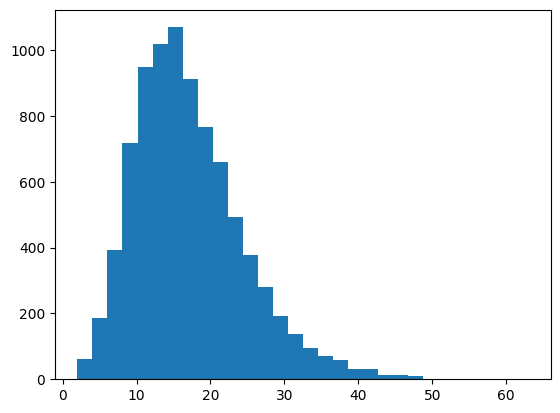

In [104]:
data_fakenews['text lenght'] = data_fakenews.text.apply(lambda x: len(x.split()))
plt.hist(data_fakenews['text lenght'], bins=30);

In [93]:
data_fakenews['text lenght'].mean()

17.414071645984546

In [115]:
mask0 = data_fakenews['label'] == 0
mask1 = data_fakenews['label'] == 1
df_0 = data_fakenews[mask0]
df_1 = data_fakenews[mask1]

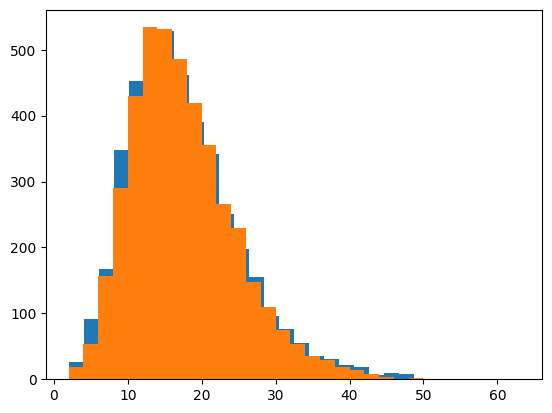

In [116]:
plt.hist(df_0['text lenght'], bins=30);
plt.hist(df_1['text lenght'], bins=30);

In [96]:
df_1.head(10)

,id,text,label,dataset_id,text lenght
4271,072-4937,State employees will have to pay 100 percent o...,1,72,16
4272,072-3981,On in state tuition for illegal immigrants,1,72,7
4273,072-1057,The Z visa that was offered in that Senate bi...,1,72,27
4274,072-4532,An amazing 5 400 jobs were lost in the first 1...,1,72,22
4275,072-9335,Photos prove the Denver light rail system has ...,1,72,10
4276,072-12824,There is no system to vet refugees from the Mi...,1,72,11
4277,072-5235,U S Reps Hank Johnson John Lewis and other mem...,1,72,26
4278,072-8605,In the last 10 years only one piece of legisla...,1,72,19
4279,072-8236,Says Ken Cuccinelli attacked churches for help...,1,72,9
4280,072-3426,Thomas Paine wrote that the duty of a patriot ...,1,72,17


In [79]:
mask = data_fakenews['text lenght'] < 3

small_headlines = data_fakenews[mask]
small_headlines

,id,text,label,dataset_id,text lenght
1851,072-2355,On torture,0,72,2
4620,072-7832,On abortion,1,72,2
5196,072-12012,On redistricting,1,72,2
6489,072-4237,On reconciliation,1,72,2
7237,072-12227,On debating,1,72,2
7902,012-2731,Banksy JeSuisCharlie,1,12,2
7996,072-7435,Were bankrupt,1,72,2
8053,072-8951,On sequestration,1,72,2
8442,072-1993,On abortion,1,72,2


In [124]:
!pip install wordcloud


(-0.5, 399.5, 199.5, -0.5)

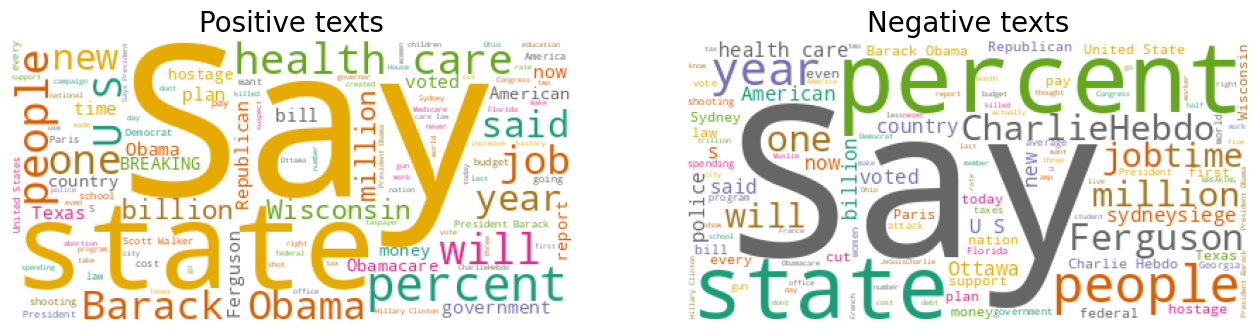

In [126]:
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap

# Create a wordcloud for positive and negative texts
pos_text = ' '.join(data_fakenews[data_fakenews.label == 1].text)
neg_text = ' '.join(data_fakenews[data_fakenews.label == 0].text)
wc = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(pos_text))
plt.title('Positive texts', fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wc.generate(neg_text))
plt.title('Negative texts', fontsize=20)
plt.axis('off')

# Hate Speach dataset

In [128]:
data_hate.shape

(339010, 5)

In [119]:
data_hate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339010 entries, 0 to 339009
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          339010 non-null  object
 1   text        339010 non-null  object
 2   label       339010 non-null  int64 
 3   dataset_id  339010 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 10.3+ MB


In [121]:
print(f"Hate speech data set has {data_hate.duplicated().sum()} duplicates")
print(f"in fakenews: {data_hate['label'].sum()} biased headlines or {100*(data_hate['label'].sum())/data_hate.shape[0]}%")

Hate speech data set has 0 duplicates
in fakenews: 169505 biased headlines or 50.0%


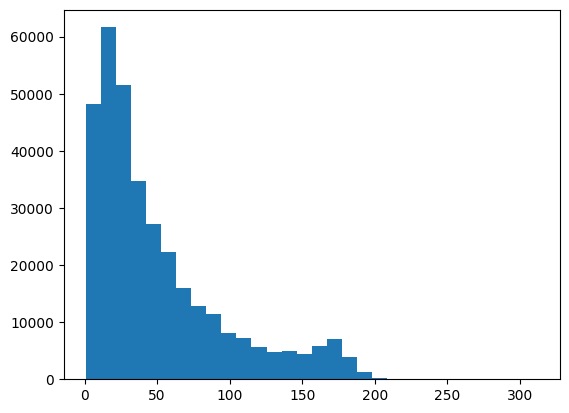

In [122]:
data_hate['text lenght'] = data_hate.text.apply(lambda x: len(x.split()))
plt.hist(data_hate['text lenght'], bins=30);

(-0.5, 399.5, 199.5, -0.5)

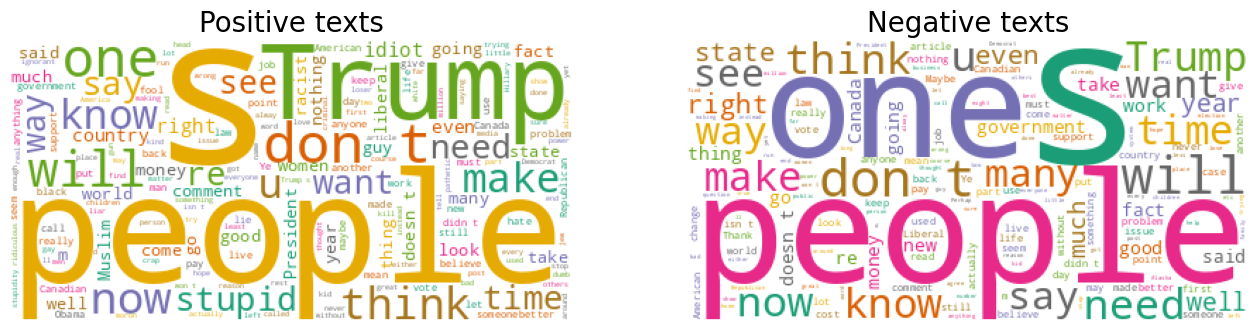

In [127]:
pos_text = ' '.join(data_hate[data_hate.label == 1].text)
neg_text = ' '.join(data_hate[data_hate.label == 0].text)
wc = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wc.generate(pos_text))
plt.title('Positive texts', fontsize=20)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wc.generate(neg_text))
plt.title('Negative texts', fontsize=20)
plt.axis('off')

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


X = data_cognitive['text']
y = data_cognitive['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy_clf = DummyClassifier(strategy="uniform")

dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4897815362931642
